In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [27]:
df = pd.read_csv('training.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [28]:
# Check for null values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# Identify and drop columns with all values as 0
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1 and df[col].unique()[0] == 0]
print("Columns with all values as 0:", columns_to_drop)

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Display the updated dataset information
print("Updated Dataset Info:")
print(df.info())

Null values in each column:
 hour_of_day       0
day_of_week       0
month             0
holiday           0
weekday           0
summertime        0
temp              0
dew               0
humidity          0
precip            0
snow              0
snowdepth         0
windspeed         0
cloudcover        0
visibility        0
increase_stock    0
dtype: int64
Columns with all values as 0: ['snow']
Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity       

In [29]:
df

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,high_bike_demand


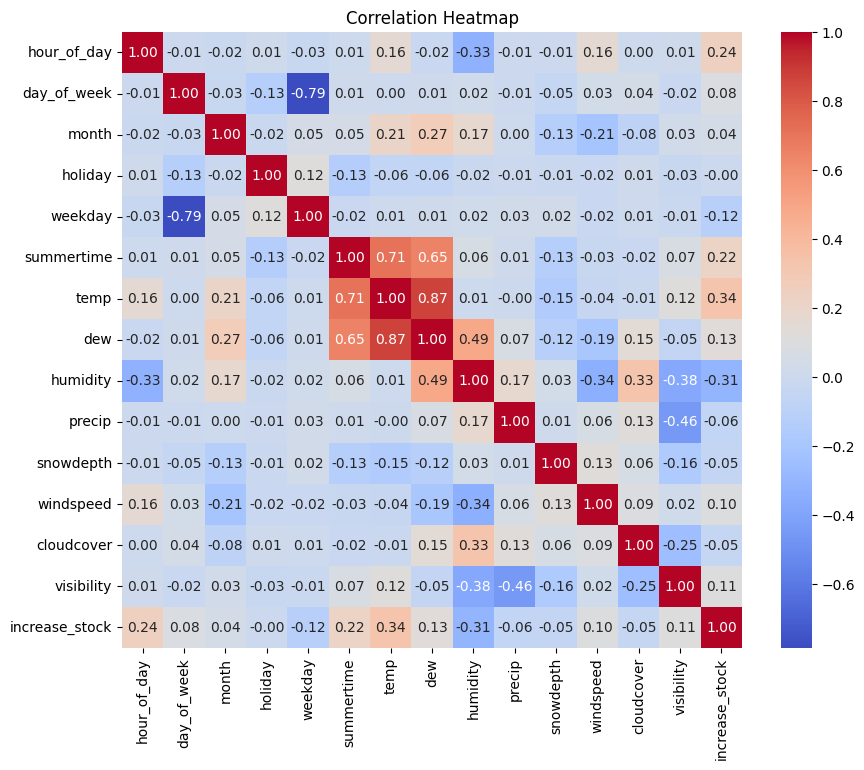

Statistical Analysis of Features with Respect to Target:
        Feature  Correlation       P-value Significant?
0   hour_of_day     0.240544  1.707474e-22          yes
1   day_of_week     0.083688  8.058892e-04          yes
2         month     0.037212  1.367941e-01           no
3       holiday    -0.004909  8.444566e-01           no
4       weekday    -0.116446  3.010589e-06          yes
5    summertime     0.216052  2.357558e-18          yes
6          temp     0.336981  8.782314e-44          yes
7           dew     0.132663  1.004293e-07          yes
8      humidity    -0.308726  1.123354e-36          yes
9        precip    -0.059304  1.767371e-02          yes
10    snowdepth    -0.047526  5.734902e-02           no
11    windspeed     0.096011  1.198961e-04          yes
12   cloudcover    -0.045534  6.862557e-02           no
13   visibility     0.113443  5.393194e-06          yes


In [30]:
df['increase_stock'] = df['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

target_col = 'increase_stock'
significance_threshold = 0.05
results = []

for col in df.columns:
    if col != target_col and np.issubdtype(df[col].dtype, np.number):  
        corr, p_value = pearsonr(df[col], df[target_col])
        significance = "yes" if p_value <= significance_threshold else "no"
        results.append([col, corr, p_value, significance])

results_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-value', 'Significant?'])

print("Statistical Analysis of Features with Respect to Target:")
print(results_df)


In [31]:
X = df.drop(columns=['increase_stock'])  
X = X.select_dtypes(include=[np.number])  

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

        Feature        VIF
0   hour_of_day   4.419851
1   day_of_week   8.562966
2         month   5.242078
3       holiday   1.079550
4       weekday   9.103757
5    summertime   6.073319
6          temp  66.763011
7           dew  32.271435
8      humidity  43.983042
9        precip   1.289503
10    snowdepth   1.092724
11    windspeed   4.689751
12   cloudcover   6.032148
13   visibility  51.227301


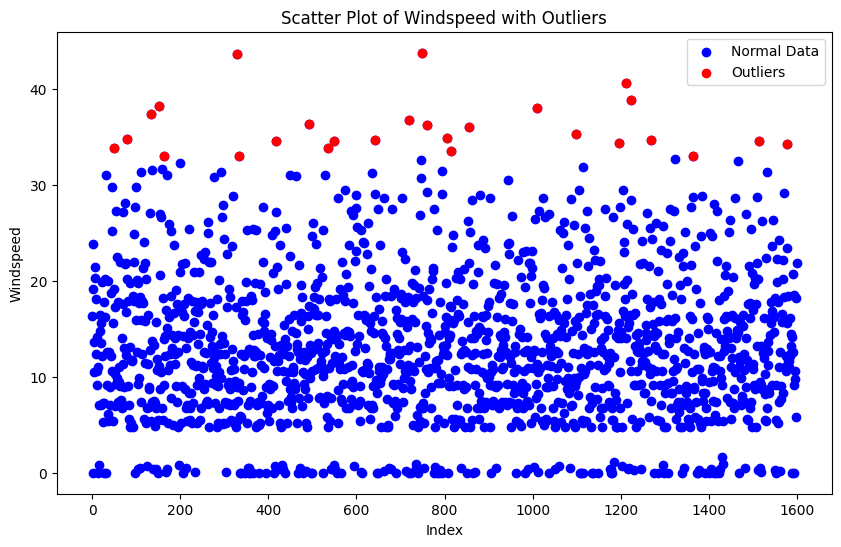

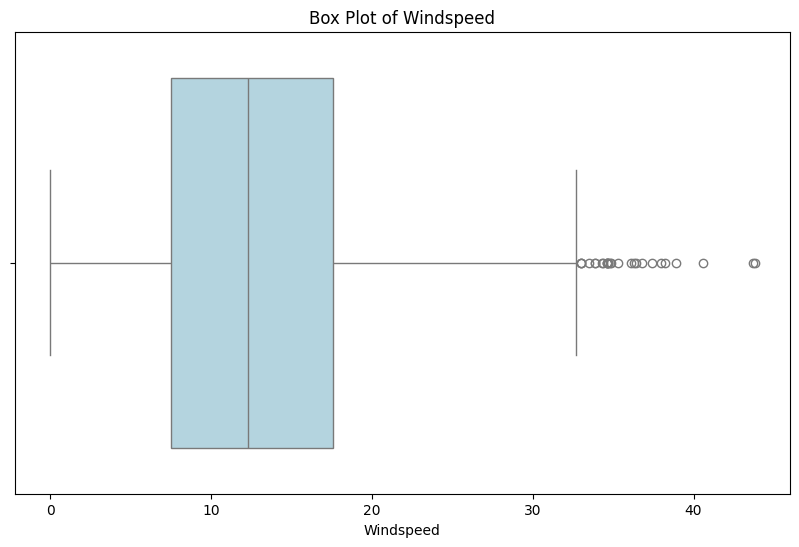

In [32]:
# Calculate the IQR for windspeed to identify outliers
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['windspeed'] < lower_bound) | (df['windspeed'] > upper_bound)]

# Create scatter plot of windspeed
plt.figure(figsize=(10, 6))

# Scatter plot with outliers in red
plt.scatter(df.index, df['windspeed'], color='blue', label='Normal Data')
plt.scatter(outliers.index, outliers['windspeed'], color='red', label='Outliers')

plt.title('Scatter Plot of Windspeed with Outliers')
plt.xlabel('Index')
plt.ylabel('Windspeed')
plt.legend()
plt.show()

# Create Box Plot to visualize the IQR and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['windspeed'], color='lightblue')

plt.title('Box Plot of Windspeed')
plt.xlabel('Windspeed')
plt.show()


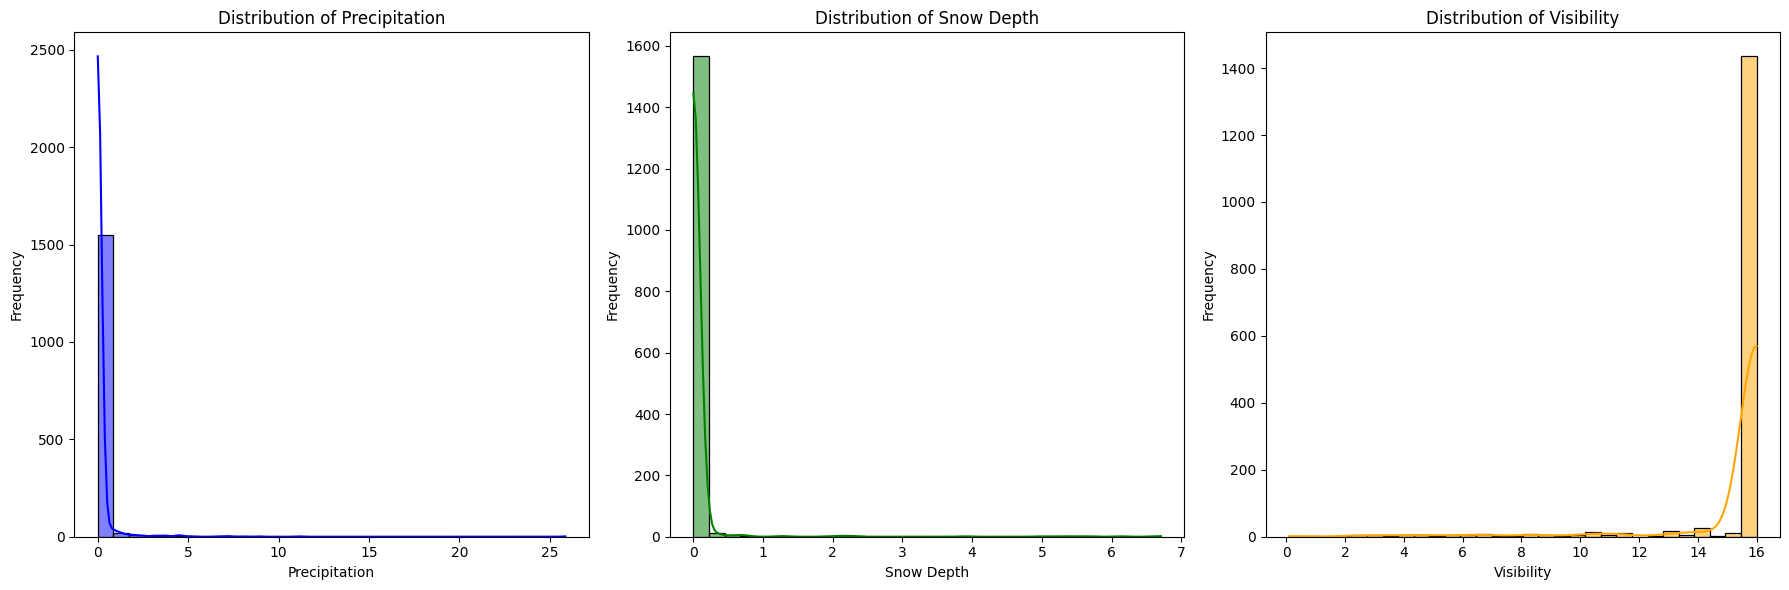

In [33]:
# Set up the figure with subplots for each predictor variable
plt.figure(figsize=(18, 6))

# Plot for precipitation
plt.subplot(1, 3, 1)
sns.histplot(df['precip'], kde=True, color='blue', bins=30)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')

# Plot for snow depth
plt.subplot(1, 3, 2)
sns.histplot(df['snowdepth'], kde=True, color='green', bins=30)
plt.title('Distribution of Snow Depth')
plt.xlabel('Snow Depth')
plt.ylabel('Frequency')

# Plot for visibility
plt.subplot(1, 3, 3)
sns.histplot(df['visibility'], kde=True, color='orange', bins=30)
plt.title('Distribution of Visibility')
plt.xlabel('Visibility')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


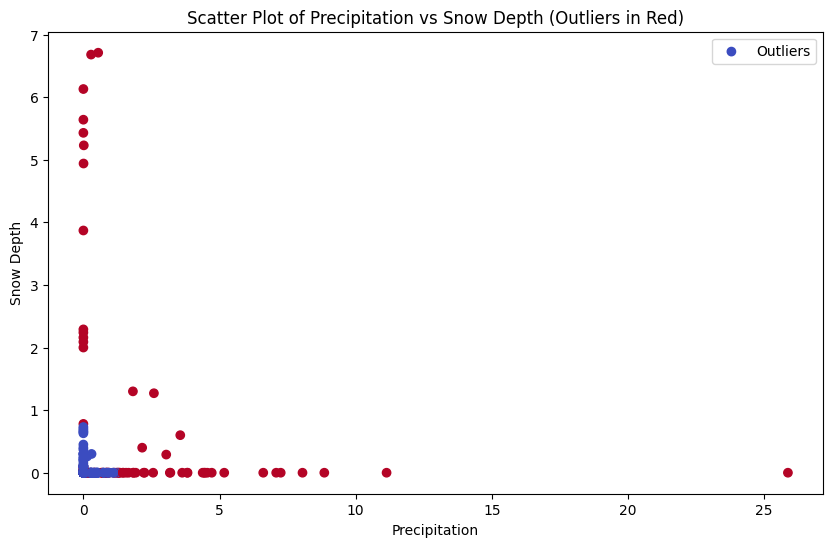

Total detected outliers: 80


In [34]:
features = ['precip', 'snowdepth', 'visibility']
X = df[features]

iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination threshold if necessary

outliers = iso_forest.fit_predict(X)

df['outlier'] = np.where(outliers == -1, 1, 0)

plt.figure(figsize=(10, 6))
plt.scatter(df['precip'], df['snowdepth'], c=df['outlier'], cmap='coolwarm', label='Outliers')
plt.xlabel('Precipitation')
plt.ylabel('Snow Depth')
plt.title('Scatter Plot of Precipitation vs Snow Depth (Outliers in Red)')
plt.legend()
plt.show()

print(f"Total detected outliers: {df['outlier'].sum()}")
